## IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#plt.rcParams['figure.figsize'] = [12, 8]
#plt.rcParams['figure.dpi'] = 100 

IMPORTING A SAMPLE OF THE DATA

In [6]:

main = pd.read_csv('main.tsv', sep='\t', header=0)

In [7]:
# Illustration of the top 5 rows in order to see how our table looks like
main.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."


In [8]:
if main['user_id'].nunique() == len(main):
    print('All users have explored only once')
else: print('Some users have visited the points of sales more than once')
print('Total unique users: ',main['user_id'].nunique(),' and total data entries: ',len(main))

Some users have visited the points of sales more than once
Total unique users:  812638  and total data entries:  2577809


EXPLORATORY DATA ANALYSIS

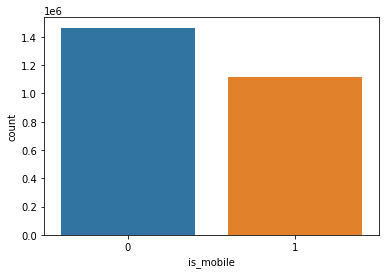

In [9]:
# Let's see how many searches were conducted via cellphone and how many not


ax = sns.countplot(x="is_mobile", data=main)

In [10]:
main.isna().sum()

user_id                       0
search_id                     0
search_timestamp              0
point_of_sale                 0
geo_location_country          0
is_mobile                     0
destination_id                0
checkin_date                201
checkout_date               201
adult_count                   0
child_count                   0
infant_count                  0
room_count                    0
sort_type                     0
applied_filters         1728645
impressions                   0
dtype: int64

In [12]:
def correct_zer(x):
    
    if len(x) == 0:
            x = 0
    return x

In [13]:
def correct_neg(x):
    if x<0:
        x= None
    return x

In [14]:
#Extracting date out of the timestamp. This aims to see how
# many days before staying did the search take place
main['search_time'] = main['search_timestamp'].str[:10]
main['search_time']= pd.to_datetime(main['search_time'])
main['check_date']= pd.to_datetime(main['checkin_date'])
main['days_before_staying'] = main['check_date'] - main['search_time']
main['days_before_staying'] = main['days_before_staying'].astype(str)
main['days_before_staying'] = main['days_before_staying'].str[:-5]
main['days_before_staying'] = main['days_before_staying'].apply(correct_zer)
main['days_before_staying'] = main['days_before_staying'].astype(int)

In [15]:
main['days_before_staying'] = main['days_before_staying'].apply(correct_neg)

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


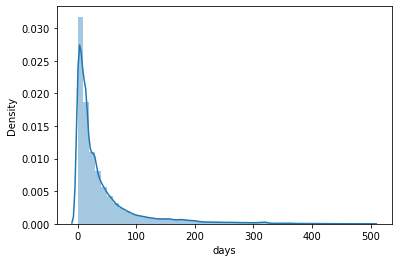

In [16]:
ax = sns.distplot(x=main['days_before_staying'],axlabel='days')
# We see that most of the people do not schedule much ahead. Maybe they decide vacations or business at the 
#very last moment, or waiting for something better to rise until the last moment

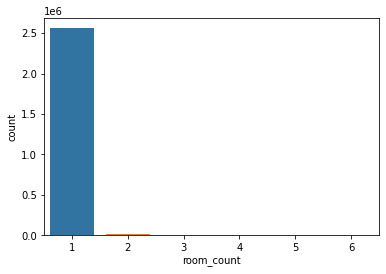

In [17]:
#How many rooms were the searches about
ax = sns.countplot(x=main['room_count'])

Transforming some integers to strings since the do not have quantity meaning

In [18]:
main['user_id'] = main['user_id'].astype('str')
main['search_id'] = main['search_id'].astype('str')
main['point_of_sale'] = main['point_of_sale'].astype('str')
main['geo_location_country'] = main['geo_location_country'].astype('str')
main['destination_id'] = main['destination_id'].astype('str')

In [19]:
main.dtypes

user_id                         object
search_id                       object
search_timestamp                object
point_of_sale                   object
geo_location_country            object
is_mobile                        int64
destination_id                  object
checkin_date                    object
checkout_date                   object
adult_count                      int64
child_count                      int64
infant_count                     int64
room_count                       int64
sort_type                       object
applied_filters                 object
impressions                     object
search_time             datetime64[ns]
check_date              datetime64[ns]
days_before_staying            float64
dtype: object

New column revealing whether it is a family search or not

In [20]:
main['family'] =[main['child_count'][x] + main['infant_count'][x] > 0 for x in  main.index.tolist()]

In [21]:
main

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions,search_time,check_date,days_before_staying,family
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,...",2021-07-02,2021-07-04,2.0,False
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0",2021-06-23,2021-09-10,79.0,False
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759...",2021-06-10,2021-07-07,27.0,False
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059...",2021-07-16,2021-08-25,40.0,False
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,...",2021-07-07,2021-08-30,54.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577804,ffde5a54ea8f3b225f5ed82801bc8e04,f4ab1530a53c82976072dec5c80ee30f,2021-06-18T19:23:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...",2021-06-18,2021-07-01,13.0,False
2577805,ffde5a54ea8f3b225f5ed82801bc8e04,7defa5f7f28e8a42b970c7867a7fbab7,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,PRICE:1,"1,5828015,0,3.0,650.0,2.0,1,0,2,0,0|2,1111866,...",2021-06-18,2021-07-01,13.0,False
2577806,ffde5a54ea8f3b225f5ed82801bc8e04,0e2ffe5983f425ee8edeaa5c431e5e90,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...",2021-06-18,2021-07-01,13.0,False
2577807,ffdfca5abb43a1931980abac7101aa59,ab879b951d96cb973417b3c76a83f764,2021-07-14T23:21:00.000Z,21,33,0,8249,2021-09-14,2021-09-18,2,0,0,1,PRICE ASCENDING,NaN,"1,5233550,0,null,null,null,1,1,1,0,0",2021-07-14,2021-09-14,62.0,False


In [22]:
# How many searches included chuldren and how many not
main['family'].value_counts()

False    2224347
True      353462
Name: family, dtype: int64

In [23]:
# Total people of each search
main['total_people'] = main['adult_count'] +main['child_count'] +main['infant_count']

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


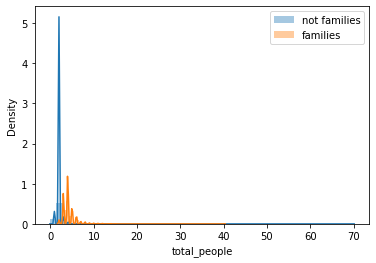

In [24]:
# Comparison bwtween distributions of total people whether kids are included or not
sns.distplot(main[~main['family']]['total_people'], label='not families', color='C0')
sns.distplot(main[main['family']]['total_people'], label='families', color='C1')

plt.legend()

# EXPORTING CLICKED AND BOOKED HOTELS OUT OF ATTRIBUTE: 'IMPRESSIONS'

In [25]:
# Let's make a copy of the starting dataset
df = main

In [26]:
# The following function is accepting as
#input a string and splits it on char '|'
#If the strings that were designed after the split have as last 3 characters these--> '0,0'
#it means that this string's hotel was neither clicked nor booked. I do this in order to keep
# the rest of the hotels. So the function return the strings with hotels booked or clicked
def func(x):
    b = []
    x = x.split('|')
    for i in x:
        if i[-3:] != '0,0':
            b.append(i)
    if len(b) == 0:
        b = 0
    return b

In [27]:
# Applying the function on the impressions columns
df['impressions_new'] = df['impressions'].apply(func)

In [28]:
df1 = df[['user_id', "days_before_staying",'impressions_new']]

In [29]:
df1

,user_id,days_before_staying,impressions_new
0,001bbff3030c95740d4c55bb72e823e9,2.0,"[7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530..."
1,002ba2a7c74dbffc32e4568af230d49a,79.0,0
2,00c5152ed6ef5b937e8320a260bde084,27.0,"[1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]"
3,00d5e2bca7962f67d5695e7e7b92feb8,40.0,0
4,013f92616fe583c4ba0c3919b69cf3d9,54.0,0
...,...,...,...
2577804,ffde5a54ea8f3b225f5ed82801bc8e04,13.0,0
2577805,ffde5a54ea8f3b225f5ed82801bc8e04,13.0,0
2577806,ffde5a54ea8f3b225f5ed82801bc8e04,13.0,0
2577807,ffdfca5abb43a1931980abac7101aa59,62.0,0


In [30]:
# Getting rid of searches without clicks
df1 =df1[df1['impressions_new']!=0]

In [31]:
#resetting index
df1 = df1.reset_index()

In [32]:
#dropping the previous index column
df1.drop('index', inplace=True, axis=1)

In [33]:
df1

,user_id,days_before_staying,impressions_new
0,001bbff3030c95740d4c55bb72e823e9,2.0,"[7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530..."
1,00c5152ed6ef5b937e8320a260bde084,27.0,"[1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]"
2,016f433e1e98146912a7c2600c2ad3f0,30.0,"[1,1417933,0,4.0,200.0,3.0,1,0,1,2,0]"
3,01a367de6a4a099fbd380ad28f9314aa,53.0,"[1,4291709,0,4.0,1025.0,3.0,1,0,5,1,0]"
4,028382cf0696909da6c5bc201a4a2027,14.0,"[1,1767157,0,4.0,25.0,5.0,1,1,4,2,0]"
...,...,...,...
491094,feca99cc15cdc1104816a55e76b73a8b,2.0,"[5,5081655,0,4.0,600.0,3.0,1,1,3,1,0]"
491095,feca99cc15cdc1104816a55e76b73a8b,14.0,"[13,1771106,0,3.0,1025.0,2.0,0,1,1,1,0]"
491096,fef65427171b72e647359b4bd1dabc7d,29.0,"[3,525177,0,4.0,25.0,null,1,0,2,1,0]"
491097,ffaa2dc7ded51307a3f1ec1f73659bad,3.0,"[6,3575440,0,4.0,450.0,3.0,1,0,2,1,0]"


In [34]:
# Buliding a new df which contains only users,days_before_staying and impressions
df2 = pd.DataFrame(columns=[])
a=[]
b=[]
c=[]


for i in range(0,len(df1)):
    for y in range(0,len(df1['impressions_new'][i])):
        a.append(df1['user_id'][i])
        b.append(df1['days_before_staying'][i])
        c.append(df1['impressions_new'][i][y])
        
df2['user_id'] = a
df2['days_before_staying'] = b
df2['impressions_new'] = c

In [35]:
# Splitting the information inside impressions

def collapse(x):
    return x.split(',')

In [36]:

df2['impressions_new'] = df2['impressions_new'].apply(collapse)

In [37]:
# Creating new columns
names = ['rank','prop_id','is_travel_ad','review_rating','review_count',
         'star_rating','is_free_cancellation','is_drr','price_bucket',
        'num_clicks','is_trans']
for i in range(0,len(names)):
    
    df2[names[i]] = df2['impressions_new'].apply(lambda x: x[i])

In [38]:
# Types of columns
df2.dtypes

user_id                  object
days_before_staying     float64
impressions_new          object
rank                     object
prop_id                  object
is_travel_ad             object
review_rating            object
review_count             object
star_rating              object
is_free_cancellation     object
is_drr                   object
price_bucket             object
num_clicks               object
is_trans                 object
dtype: object

In [39]:
# Replacing texts writting null with actual None
df2 = df2.replace('null', None)

In [40]:
df2.isna().sum()

user_id                     0
days_before_staying     15213
impressions_new             0
rank                        0
prop_id                     0
is_travel_ad                0
review_rating               0
review_count                0
star_rating                 0
is_free_cancellation        0
is_drr                      0
price_bucket                0
num_clicks                  0
is_trans                    0
dtype: int64

In [41]:
# Changing types of columns

df2['rank']=df2['rank'].astype(float)

df2['is_travel_ad']=df2['is_travel_ad'].astype(float)
df2['review_rating']=df2['review_rating'].astype(float)
df2['review_count']=df2['review_count'].astype(float)
df2['star_rating']=df2['star_rating'].astype(float)
df2['is_free_cancellation']=df2['is_free_cancellation'].astype(float)
df2['is_drr']=df2['is_drr'].astype(float)
df2['num_clicks']=df2['num_clicks'].astype(int)
df2['is_trans']=df2['is_trans'].astype(int)

In [42]:
# I do not care about the quantity of clicks on a hotel
# When we have clicks I will assume that the user clicked it
df2['num_clicks'] = df2['num_clicks'].apply(lambda x: x>0).astype(int)

In [43]:
df2

,user_id,days_before_staying,impressions_new,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans
0,001bbff3030c95740d4c55bb72e823e9,2.0,"[7, 2722643, 0, 4.0, 75.0, 3.0, 1, 1, 2, 1, 0]",7.0,2722643,0.0,4.0,75.0,3.0,1.0,1.0,2,1,0
1,001bbff3030c95740d4c55bb72e823e9,2.0,"[9, 1197530, 0, 4.0, 250.0, 3.0, 1, 0, 2, 1, 0]",9.0,1197530,0.0,4.0,250.0,3.0,1.0,0.0,2,1,0
2,001bbff3030c95740d4c55bb72e823e9,2.0,"[12, 4869920, 0, 4.0, 225.0, 3.0, 1, 0, 1, 4, 0]",12.0,4869920,0.0,4.0,225.0,3.0,1.0,0.0,1,1,0
3,00c5152ed6ef5b937e8320a260bde084,27.0,"[1, 1624072, 0, 4.0, 1250.0, 4.0, 1, 1, 2, 1, 0]",1.0,1624072,0.0,4.0,1250.0,4.0,1.0,1.0,2,1,0
4,016f433e1e98146912a7c2600c2ad3f0,30.0,"[1, 1417933, 0, 4.0, 200.0, 3.0, 1, 0, 1, 2, 0]",1.0,1417933,0.0,4.0,200.0,3.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991788,feca99cc15cdc1104816a55e76b73a8b,14.0,"[13, 1771106, 0, 3.0, 1025.0, 2.0, 0, 1, 1, 1, 0]",13.0,1771106,0.0,3.0,1025.0,2.0,0.0,1.0,1,1,0
991789,fef65427171b72e647359b4bd1dabc7d,29.0,"[3, 525177, 0, 4.0, 25.0, null, 1, 0, 2, 1, 0]",3.0,525177,0.0,4.0,25.0,2.0,1.0,0.0,2,1,0
991790,ffaa2dc7ded51307a3f1ec1f73659bad,3.0,"[6, 3575440, 0, 4.0, 450.0, 3.0, 1, 0, 2, 1, 0]",6.0,3575440,0.0,4.0,450.0,3.0,1.0,0.0,2,1,0
991791,ffc9a4179bbd3f8096ce2a4358fd571a,19.0,"[1, 713602, 1, 5.0, 4750.0, 5.0, 1, 1, 4, 1, 0]",1.0,713602,1.0,5.0,4750.0,5.0,1.0,1.0,4,1,0


In [44]:
k = df2.groupby('user_id').sum()[['num_clicks','is_trans']]
k

,num_clicks,is_trans
user_id,,
000048868edc87579f5eee72c423855b,4,0
00008bed3f921d2a65f30a20bfa87d09,2,0
00009190cf2fdaa07bb86b56d30ab459,1,0
0000a251b4bbe51e4dcc7f9c597af875,1,1
0000a72a86924c7c110c619c714336fe,2,0
...,...,...
fffeb7eb24d852767fb10945ebce8894,2,0
fffef6357a4bca629cdd4ee34c812314,1,0
ffff59fdf3ef1a58a344de2feabb3191,1,0
